In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
caminho_arquivo = '/content/drive/MyDrive/TCC - UFMS/STIL/dfFamosas.csv'
dfFamosas = pd.read_csv(caminho_arquivo)
dfFamosas.head()

,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
1,Epitáfio,Titãs,2001,Rock,Devia ter amado mais Ter chorado mais Ter vist...,Top Hits de 2001
2,Lugar Ao Sol,Charlie Brown Jr.,2001,Rock,"Que bom viver, como é bom sonhar E o que ficou...",Top Hits de 2001
3,Relicário - Ao Vivo,Cássia Eller,2001,Rock,É uma índia com colar A tarde linda que não qu...,Top Hits de 2001
4,Você Me Vira A Cabeça (Me Tira Do Sério),Alcione,2001,Samba,"Você me vira a cabeça, me tira do sério Destró...",Top Hits de 2001


In [4]:
import spacy

!python -m spacy download pt_core_news_lg
pln = spacy.load('pt_core_news_lg')
pln

from spacy.matcher import DependencyMatcher

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
caminho_arquivo = '/content/drive/MyDrive/TCC - UFMS/STIL/dfFamosas.csv'
dfFamosas = pd.read_csv(caminho_arquivo)
dfFamosas.head()

,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
1,Epitáfio,Titãs,2001,Rock,Devia ter amado mais Ter chorado mais Ter vist...,Top Hits de 2001
2,Lugar Ao Sol,Charlie Brown Jr.,2001,Rock,"Que bom viver, como é bom sonhar E o que ficou...",Top Hits de 2001
3,Relicário - Ao Vivo,Cássia Eller,2001,Rock,É uma índia com colar A tarde linda que não qu...,Top Hits de 2001
4,Você Me Vira A Cabeça (Me Tira Do Sério),Alcione,2001,Samba,"Você me vira a cabeça, me tira do sério Destró...",Top Hits de 2001


In [6]:
sujeitos_femininos = ["mulher", "mulheres", "ela", "elas", "menina", "meninas", "garota", "garotas", "senhora", "senhoras", "senhorita", "senhoritas", "moça", "moças", "donzela", "donzelas", "dama", "damas", "rainha", "rainhas", "esposa", "esposas", "namorada", "namoradas", "novinha", "novinhas", "mina", "minas"]
sujeitos_masculinos = ["homem", "homens", "ele", "eles", "menino", "meninos", "garoto", "garotos", "senhor", "senhores", "rapaz", "rapazes", "moço", "moços", "cavalheiro", "cavalheiros", "rei", "reis", "marido", "maridos", "namorado", "namorados", "novinho", "novinhos"]

#Extraindo Adjetivos, Substantivos e Verbos no Particípio no Feminino

In [7]:
dep_matcher = DependencyMatcher(vocab=pln.vocab)

vozpassiva = [{"RIGHT_ID": "verbo", "RIGHT_ATTRS": {"MORPH": {"IN": ["Gender=Fem|Number=Sing|VerbForm=Part|Voice=Pass", "Gender=Fem|Number=Plur|VerbForm=Part|Voice=Pass"]}}},
              {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj:pass", "LOWER": {"IN": sujeitos_femininos}}},
              {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "auxliar", "RIGHT_ATTRS": {"DEP": "aux:pass", "POS":"AUX"}}]

sujeitoauxadjetivo = [{"RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"POS": "ADJ"}},
                      {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"IN": sujeitos_femininos}}},
                      {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":"AUX"}}]

voceauxadjetivo = [{"RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"POS": "ADJ", "MORPH":{"IN":["Gender=Fem|Number=Sing", "Gender=Fem|Number=Plur"]}}},
                   {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"in": ["você", "vocês"]}}},
                   {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":"AUX"}}]

ficar_parecer_tornar = [{"RIGHT_ID": "verbo", "RIGHT_ATTRS": {"LEMMA":
                          {"IN": ["parecer", "ficar", "tornar"]}}},
                        {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"IN": sujeitos_femininos}}},
                        {"LEFT_ID": "verbo", "REL_OP":">", "RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"DEP":"xcomp", "POS": "ADJ"}}]

voce_ficar_parecer_tornar = [{"RIGHT_ID": "verbo", "RIGHT_ATTRS": {"LEMMA":
                                {"IN": ["parecer", "ficar", "tornar"]}}},
                             {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"IN": ["você", "vocês"]}}},
                             {"LEFT_ID": "verbo", "REL_OP":">", "RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"DEP":"xcomp", "POS": "ADJ", "MORPH":{"IN":["Gender=Fem|Number=Sing", "Gender=Fem|Number=Plur"]}}}]

sujeitoadjetivo = [{"RIGHT_ID": "noun", "RIGHT_ATTRS": {"LOWER": {"IN": sujeitos_femininos}}},
                   {"LEFT_ID": "noun", "REL_OP":">", "RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"DEP":"amod", "POS": "ADJ"}}]

vocesubstantivo = [{"RIGHT_ID": "substantivo", "RIGHT_ATTRS": {"POS": "NOUN", "MORPH":{"IN":["Gender=Fem|Number=Sing", "Gender=Fem|Number=Plur"]}}},
                   {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"IN": ["você", "vocês"]}}},
                   {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":{"IN":["AUX", "COP"]}}}]

substantivo = [{"RIGHT_ID": "substantivo", "RIGHT_ATTRS": {"POS": "NOUN"}},
               {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"IN": sujeitos_femininos}}},
               {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":{"IN":["AUX", "COP"]}}}]

vozpassiva_nomeproprio = [{"RIGHT_ID": "verbo", "RIGHT_ATTRS": {"MORPH": {"IN": ["Gender=Fem|Number=Sing|VerbForm=Part|Voice=Pass", "Gender=Fem|Number=Plur|VerbForm=Part|Voice=Pass"]}}},
              {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj:pass", "ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}},
              {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "auxliar", "RIGHT_ATTRS": {"DEP": "aux:pass", "POS":"AUX"}}]

sujeitoauxadjetivo_nomeproprio = [{"RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"POS": "ADJ"}},
                      {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}},
                      {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":"AUX"}}]

ficar_parecer_tornar_nomeproprio = [{"RIGHT_ID": "verbo", "RIGHT_ATTRS": {"LEMMA":
                          {"IN": ["parecer", "ficar", "tornar"]}}},
                        {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}},
                        {"LEFT_ID": "verbo", "REL_OP":">", "RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"DEP":"xcomp", "POS": "ADJ"}}]

sujeitoadjetivo_nomeproprio = [{"RIGHT_ID": "noun", "RIGHT_ATTRS": {"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}},
                   {"LEFT_ID": "noun", "REL_OP":">", "RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"DEP":"amod", "POS": "ADJ"}}]

substantivo_nomeproprio = [{"RIGHT_ID": "substantivo", "RIGHT_ATTRS": {"POS": "NOUN"}},
               {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}},
               {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":{"IN":["AUX", "COP"]}}}]


dep_matcher.add('vozpassiva', patterns=[vozpassiva])
dep_matcher.add('ficar_parecer_tornar', patterns=[ficar_parecer_tornar])
dep_matcher.add('sujeitoauxadjetivo', patterns=[sujeitoauxadjetivo])
dep_matcher.add('sujeitoadjetivo', patterns=[sujeitoadjetivo])
dep_matcher.add('voceauxadjetivo', patterns=[voceauxadjetivo])
dep_matcher.add('voce_ficar_parecer_tornar', patterns=[voce_ficar_parecer_tornar])
dep_matcher.add('substantivo', patterns=[substantivo])
dep_matcher.add('vocesubstantivo', patterns=[vocesubstantivo])
dep_matcher.add('vozpassiva_nomeproprio', patterns=[vozpassiva_nomeproprio])
dep_matcher.add('sujeitoauxadjetivo_nomeproprio', patterns=[sujeitoauxadjetivo_nomeproprio])
dep_matcher.add('ficar_parecer_tornar_nomeproprio', patterns=[ficar_parecer_tornar_nomeproprio])
dep_matcher.add('sujeitoadjetivo_nomeproprio', patterns=[sujeitoadjetivo_nomeproprio])
dep_matcher.add('substantivo_nomeproprio', patterns=[substantivo_nomeproprio])


In [8]:
resultados = []

for index, row in dfFamosas.iterrows():
    text = str(row['Letra da Música'])
    doc = pln(text)
    dep_matches = dep_matcher(doc)
    for match in dep_matches:
        pattern_name = match[0]
        matches = match[1]
        if pln.vocab[pattern_name].text in ['vozpassiva', 'voceauxadjetivo', 'sujeitoauxadjetivo', 'substantivo', 'vocesubstantivo', 'substantivo_nomeproprio', 'sujeitoauxadjetivo_nomeproprio', 'vozpassiva_nomeproprio'] :
            inicio, final = matches[1], matches[0]
            frase = doc[inicio:final+1].text
            resultados.append({'Padrão': pln.vocab[pattern_name].text,
                           'Frase': frase,
                           'Nome da Música': row['Nome da Música'],
                           'Nome do Artista': row['Nome do Artista'],
                           'Ano de Lançamento': row['Ano de Lançamento'],
                           'Gênero Musical': row['Gênero Musical'],
                           'Letra da Música': text,
                           'Playlist': row['Playlist']})
        elif pln.vocab[pattern_name].text in ['ficar_parecer_tornar', 'voce_ficar_parecer_tornar', 'ficar_parecer_tornar_nomeproprio']:
            inicio, final = matches[1], matches[2]
            frase = doc[inicio:final+1].text
            resultados.append({'Padrão': pln.vocab[pattern_name].text,
                           'Frase': frase,
                           'Nome da Música': row['Nome da Música'],
                           'Nome do Artista': row['Nome do Artista'],
                           'Ano de Lançamento': row['Ano de Lançamento'],
                           'Gênero Musical': row['Gênero Musical'],
                           'Letra da Música': text,
                           'Playlist': row['Playlist']})
        elif pln.vocab[pattern_name].text == 'sujeitoadjetivo' or pln.vocab[pattern_name].text == 'sujeitoadjetivo_nomeproprio':
            inicio, final = matches[0], matches[1]
            frase = doc[inicio:final+1].text
            resultados.append({'Padrão': pln.vocab[pattern_name].text,
                           'Frase': frase,
                           'Nome da Música': row['Nome da Música'],
                           'Nome do Artista': row['Nome do Artista'],
                           'Ano de Lançamento': row['Ano de Lançamento'],
                           'Gênero Musical': row['Gênero Musical'],
                           'Letra da Música': text,
                           'Playlist': row['Playlist']})

resultados_df = pd.DataFrame(resultados)
resultados_df.head()

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,sujeitoauxadjetivo,ela é muito sensual,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
1,sujeitoauxadjetivo,ela é muito sensual,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
2,sujeitoadjetivo,menina bem difícil,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
3,sujeitoadjetivo,menina bem difícil,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
4,voceauxadjetivo,você é diferente,Tarde Vazia (feat. Samuel Rosa) - Versão Acústica,Ira!,2004,Rock,"Pela janela vejo fumaça, vejo pessoas Na rua o...",Top Hits de 2004


In [9]:
resultados_df.shape

(662, 8)

In [10]:
resultados_df['Frase'] = resultados_df['Frase'].astype(str)
resultados_df['Frase'] = resultados_df['Frase'].str.strip()
resultados_df['Frase'] = resultados_df['Frase'].str.lower()
resultados_df['Frase'] = resultados_df['Frase'].str.replace(r'\s+', ' ', regex=True)
resultados_df = resultados_df.drop_duplicates(subset=['Frase', 'Nome da Música', 'Nome do Artista', 'Ano de Lançamento', 'Gênero Musical', 'Letra da Música'])
resultados_df.head()

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,sujeitoauxadjetivo,ela é muito sensual,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
2,sujeitoadjetivo,menina bem difícil,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
4,voceauxadjetivo,você é diferente,Tarde Vazia (feat. Samuel Rosa) - Versão Acústica,Ira!,2004,Rock,"Pela janela vejo fumaça, vejo pessoas Na rua o...",Top Hits de 2004
5,sujeitoauxadjetivo,ela é linda,Rodo cotidiano,O Rappa,2003,Rock,Ô ô ô ô ô my brother Ô ô ô ô ô my brother Ô ô ...,Top Hits de 2004
7,sujeitoauxadjetivo,ela é guerreira,Ela Vai Voltar (Todos Os Defeitos De Uma Mulhe...,Charlie Brown Jr.,2005,Rock,"Minha mente, nem sempre tão lúcida É fértil e ...",Top Hits de 2005


In [11]:
resultados_df.shape

(415, 8)

In [12]:
resultados_df['ID'] = range(1, len(resultados_df) + 1)
palavras_com_id = []

for index, row in resultados_df.iterrows():
    frase =  str(row['Frase'])
    frase_id = row['ID']
    doc = pln(frase)

    for token in doc:
        if (token.pos_ == "ADJ" or token.pos_ == "NOUN" or (token.pos_ == "VERB" and token.morph.get("VerbForm") == ["Part"])) and token.text.lower() not in sujeitos_femininos:
            palavras_com_id.append({'ID':frase_id, 'Adjetivo': token.text})

lista = pd.DataFrame(palavras_com_id)
lista.head()

<ipython-input-12-f2a4441e5b3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados_df['ID'] = range(1, len(resultados_df) + 1)


,ID,Adjetivo
0,1,sensual
1,2,difícil
2,3,diferente
3,4,linda
4,5,guerreira


In [13]:
lista.shape

(411, 2)

In [14]:
palavras_remover = ["dom", "calejado", "bom", "pequeno", "mochila", "som", "mão", "gozei", "yeah", "tipo"] #essas palavras estão sendo removidas manualmente por erro de classificação do POS Tagging
lista = lista[~lista['Adjetivo'].isin(palavras_remover)]

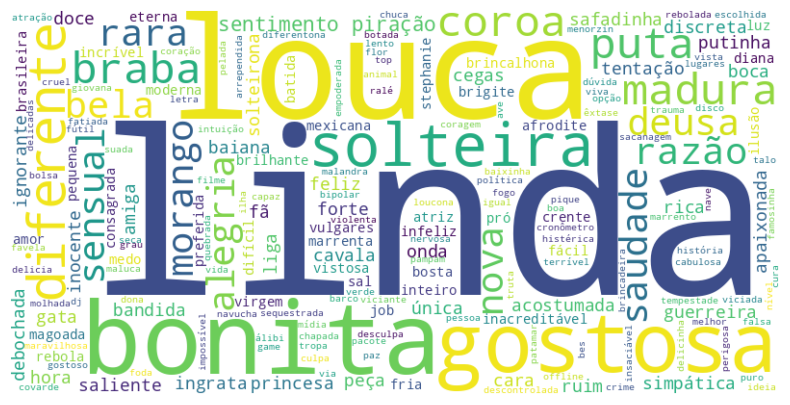

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

texto = ' '.join(lista['Adjetivo'])
nuvem_palavras = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
contagem_palavras = lista['Adjetivo'].value_counts()
ranking_adjetivos = contagem_palavras.reset_index()
ranking_adjetivos.columns = ['Adjetivo', 'Frequência']
ranking_adjetivos.head(10)

,Adjetivo,Frequência
0,linda,19
1,louca,19
2,solteira,8
3,gostosa,8
4,bonita,8
5,diferente,6
6,puta,4
7,braba,4
8,coroa,4
9,madura,4


In [17]:
lista.shape

(391, 2)

In [18]:
genero_e_palavras = resultados_df[['ID', 'Gênero Musical']].merge(lista, on='ID', how='left')
genero_e_palavras = genero_e_palavras.dropna(subset=['Adjetivo'])
contagem_por_genero = genero_e_palavras.groupby(['Gênero Musical', 'Adjetivo']).size().reset_index(name='Frequência')

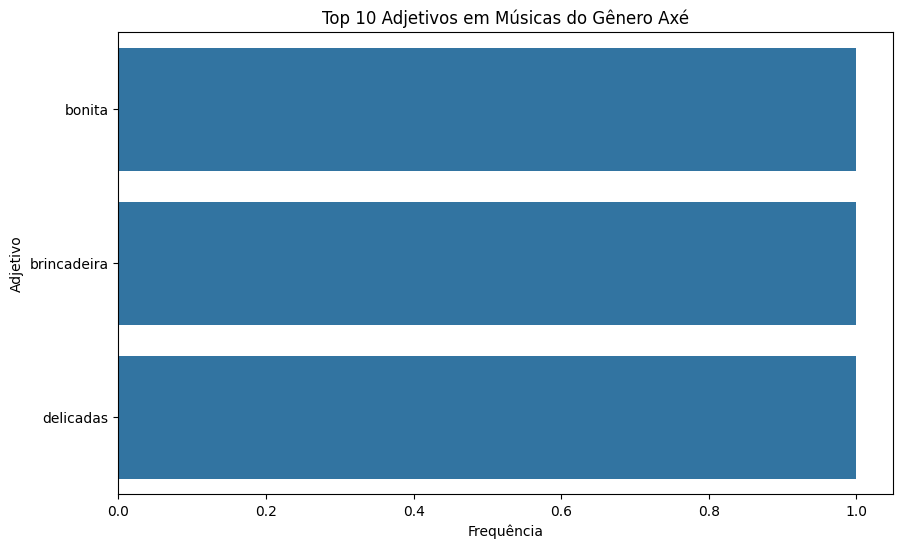

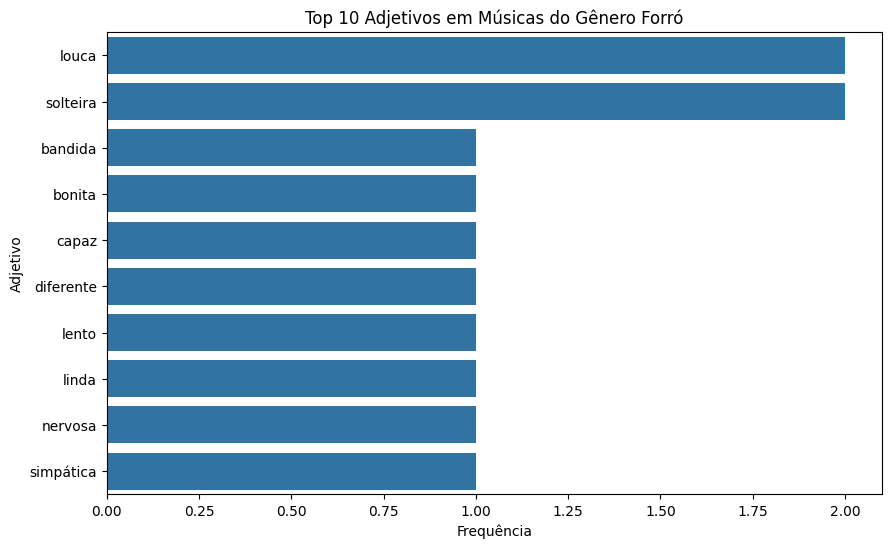

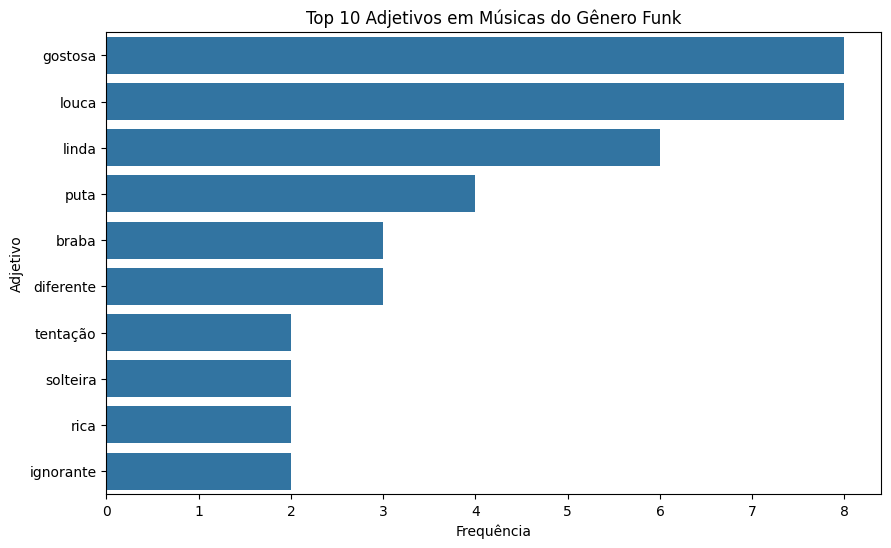

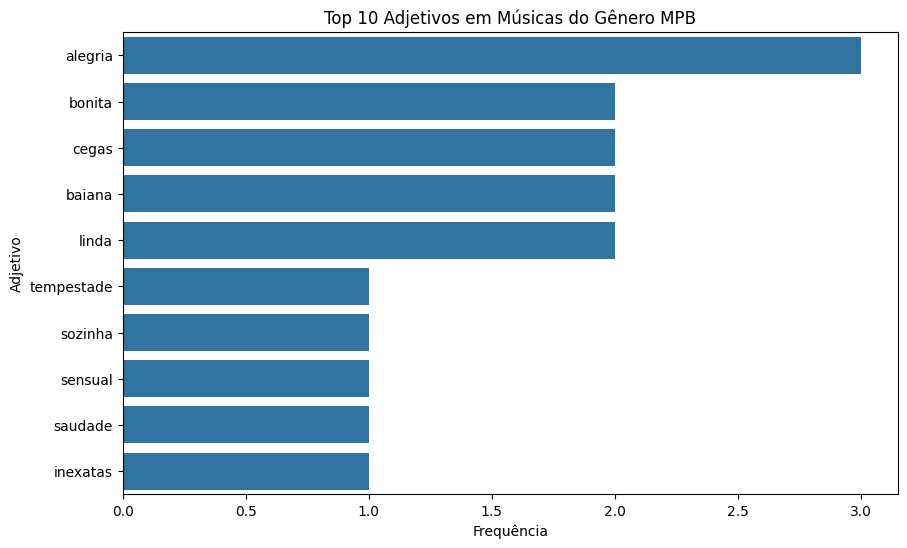

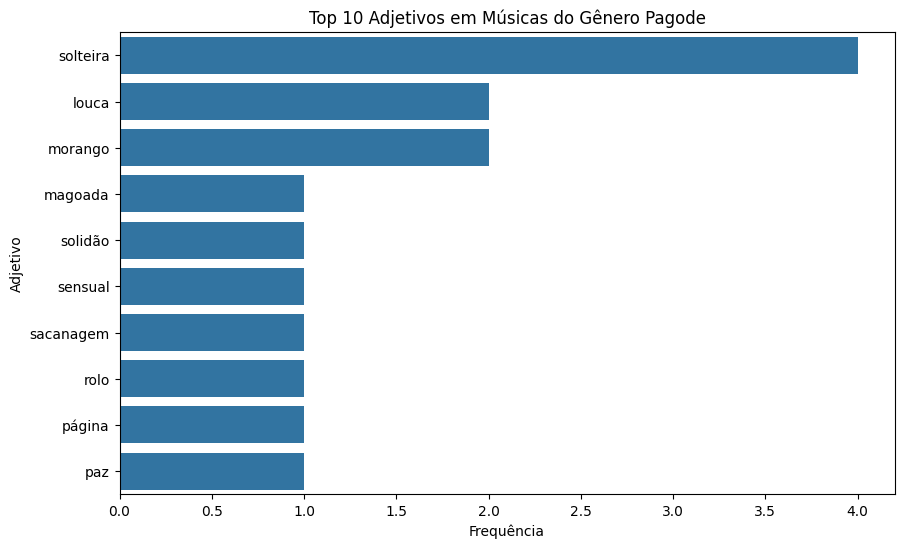

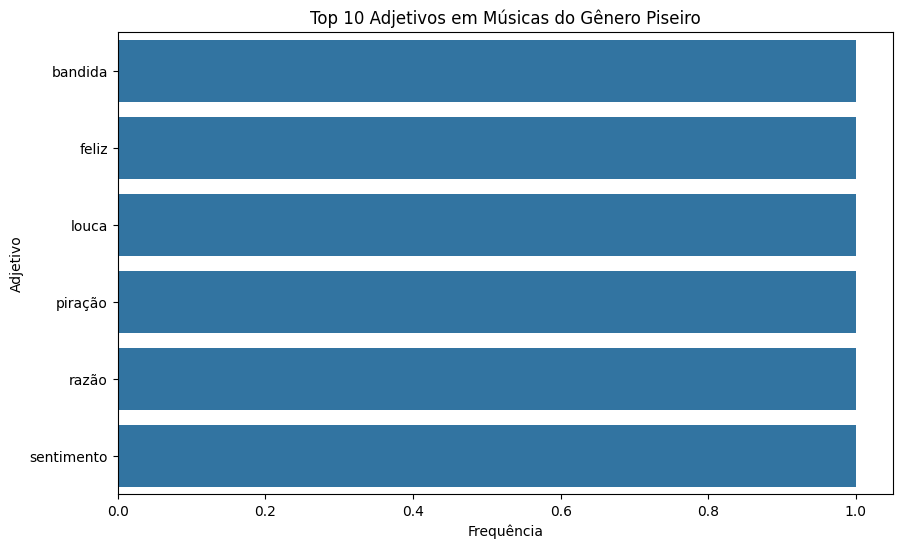

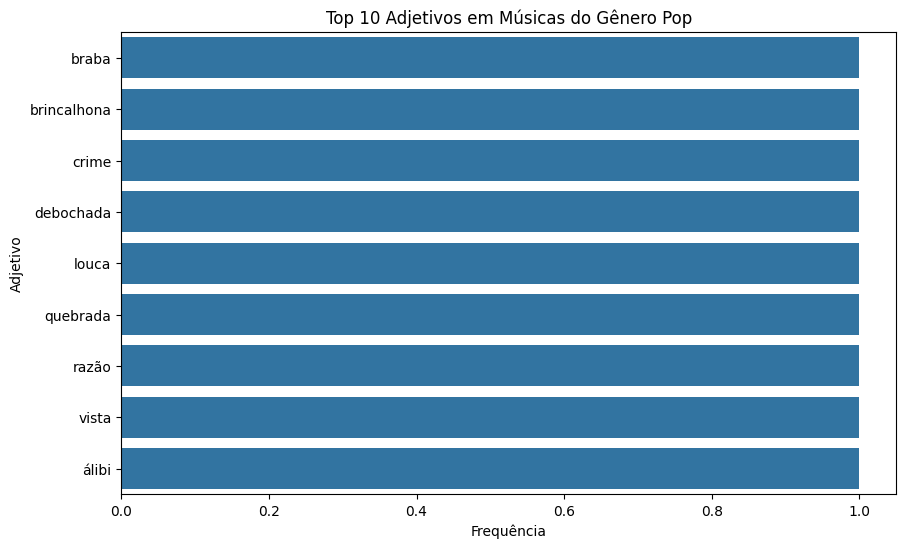

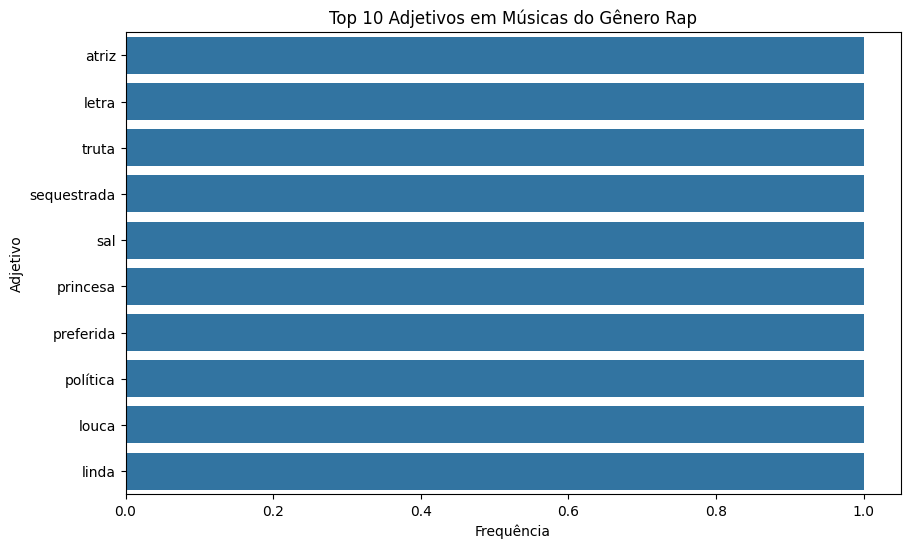

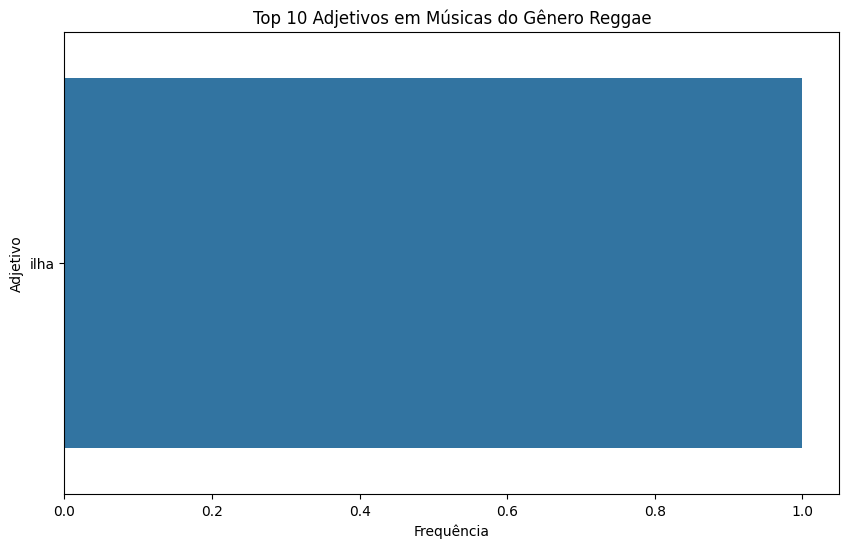

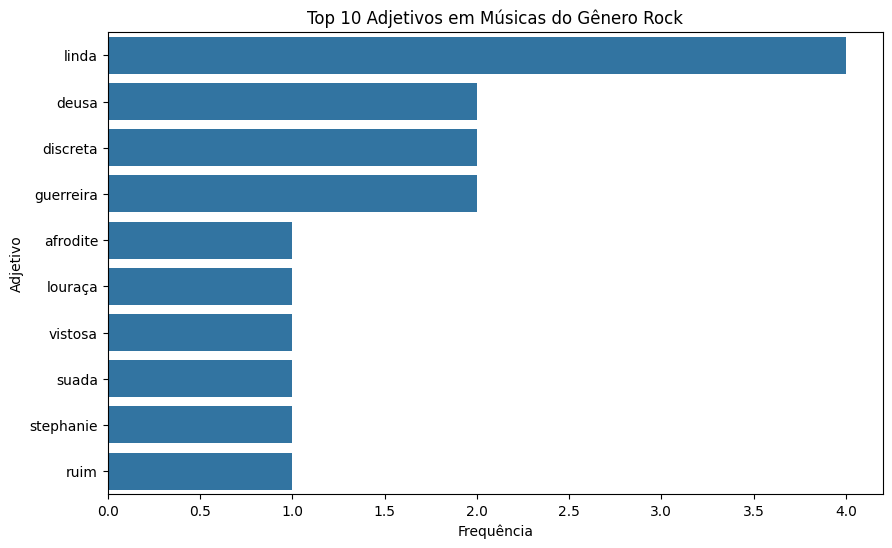

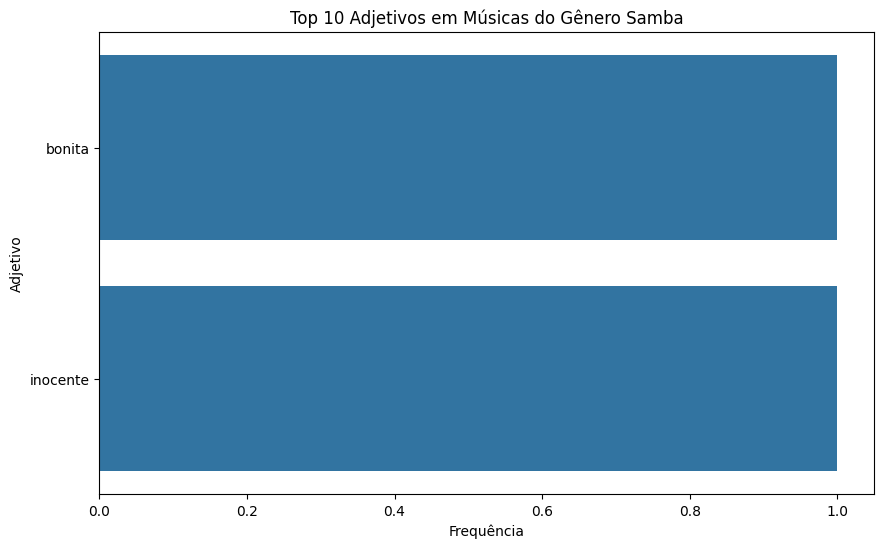

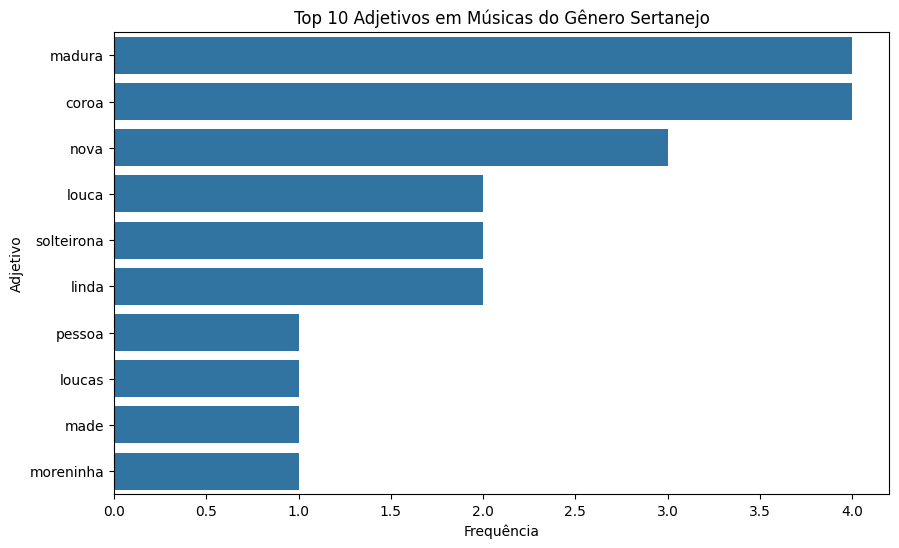

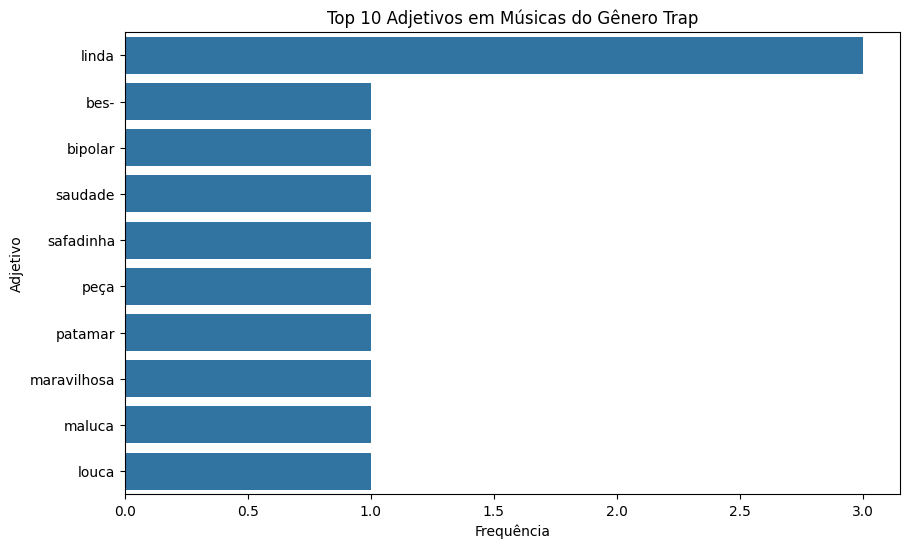

In [19]:
generos = contagem_por_genero['Gênero Musical'].unique()

for genero in generos:
    dados_genero = contagem_por_genero[contagem_por_genero['Gênero Musical'] == genero]
    dados_genero = dados_genero.sort_values(by='Frequência', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequência', y='Adjetivo', data=dados_genero)
    plt.title(f'Top 10 Adjetivos em Músicas do Gênero {genero}')
    plt.xlabel('Frequência')
    plt.ylabel('Adjetivo')
    plt.show()


In [20]:
from google.colab import files
resultados_df.to_csv('resultados.csv', index=False)
files.download('resultados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Extraindo Adjetivos, Substantivos e Verbos no Particípio no Masculino


In [21]:
dep_matcher1 = DependencyMatcher(vocab=pln.vocab)

vozpassiva = [{"RIGHT_ID": "verbo", "RIGHT_ATTRS": {"MORPH": {"IN": ["Gender=Masc|Number=Sing|VerbForm=Part|Voice=Pass", "Gender=Masc|Number=Plur|VerbForm=Part|Voice=Pass"]}}},
              {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj:pass", "LOWER": {"IN": sujeitos_masculinos}}},
              {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "auxliar", "RIGHT_ATTRS": {"DEP": "aux:pass", "POS":"AUX"}}]

sujeitoauxadjetivo = [{"RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"POS": "ADJ"}},
                      {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"IN": sujeitos_masculinos}}},
                      {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":"AUX"}}]

voceauxadjetivo = [{"RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"POS": "ADJ", "MORPH":{"IN":["Gender=Masc|Number=Sing", "Gender=Masc|Number=Plur"]}}},
                   {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"in": ["você", "vocês"]}}},
                   {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":"AUX"}}]

ficar_parecer_tornar = [{"RIGHT_ID": "verbo", "RIGHT_ATTRS": {"LEMMA":
                          {"IN": ["parecer", "ficar", "tornar"]}}},
                        {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"IN": sujeitos_masculinos}}},
                        {"LEFT_ID": "verbo", "REL_OP":">", "RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"DEP":"xcomp", "POS": "ADJ"}}]

voce_ficar_parecer_tornar = [{"RIGHT_ID": "verbo", "RIGHT_ATTRS": {"LEMMA":
                                {"IN": ["parecer", "ficar", "tornar"]}}},
                             {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"IN": ["você", "vocês"]}}},
                             {"LEFT_ID": "verbo", "REL_OP":">", "RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"DEP":"xcomp", "POS": "ADJ", "MORPH":{"IN":["Gender=Masc|Number=Sing", "Gender=Masc|Number=Plur"]}}}]

sujeitoadjetivo = [{"RIGHT_ID": "noun", "RIGHT_ATTRS": {"LOWER": {"IN": sujeitos_masculinos}}},
                   {"LEFT_ID": "noun", "REL_OP":">", "RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"DEP":"amod", "POS": "ADJ"}}]

vocesubstantivo = [{"RIGHT_ID": "substantivo", "RIGHT_ATTRS": {"POS": "NOUN", "MORPH":{"IN":["Gender=Masc|Number=Sing", "Gender=Masc|Number=Plur"]}}},
                   {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"IN": ["você", "vocês"]}}},
                   {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":{"IN":["AUX", "COP"]}}}]

substantivo = [{"RIGHT_ID": "substantivo", "RIGHT_ATTRS": {"POS": "NOUN"}},
               {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "LOWER": {"IN": sujeitos_masculinos}}},
               {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":{"IN":["AUX", "COP"]}}}]

vozpassiva_nomeproprio = [{"RIGHT_ID": "verbo", "RIGHT_ATTRS": {"MORPH": {"IN": ["Gender=Masc|Number=Sing|VerbForm=Part|Voice=Pass", "Gender=Masc|Number=Plur|VerbForm=Part|Voice=Pass"]}}},
              {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj:pass", "ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}},
              {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "auxliar", "RIGHT_ATTRS": {"DEP": "aux:pass", "POS":"AUX"}}]

sujeitoauxadjetivo_nomeproprio = [{"RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"POS": "ADJ"}},
                      {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}},
                      {"LEFT_ID": "adjetivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":"AUX"}}]

ficar_parecer_tornar_nomeproprio = [{"RIGHT_ID": "verbo", "RIGHT_ATTRS": {"LEMMA":
                          {"IN": ["parecer", "ficar", "tornar"]}}},
                        {"LEFT_ID": "verbo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}},
                        {"LEFT_ID": "verbo", "REL_OP":">", "RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"DEP":"xcomp", "POS": "ADJ"}}]

sujeitoadjetivo_nomeproprio = [{"RIGHT_ID": "noun", "RIGHT_ATTRS": {"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}},
                   {"LEFT_ID": "noun", "REL_OP":">", "RIGHT_ID": "adjetivo", "RIGHT_ATTRS": {"DEP":"amod", "POS": "ADJ"}}]

substantivo_nomeproprio = [{"RIGHT_ID": "substantivo", "RIGHT_ATTRS": {"POS": "NOUN"}},
               {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "sujeito", "RIGHT_ATTRS": {"DEP": "nsubj", "ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}},
               {"LEFT_ID": "substantivo", "REL_OP": ">", "RIGHT_ID": "auxiliar", "RIGHT_ATTRS": {"POS":{"IN":["AUX", "COP"]}}}]


dep_matcher1.add('vozpassiva', patterns=[vozpassiva])
dep_matcher1.add('ficar_parecer_tornar', patterns=[ficar_parecer_tornar])
dep_matcher1.add('sujeitoauxadjetivo', patterns=[sujeitoauxadjetivo])
dep_matcher1.add('sujeitoadjetivo', patterns=[sujeitoadjetivo])
dep_matcher1.add('voceauxadjetivo', patterns=[voceauxadjetivo])
dep_matcher1.add('voce_ficar_parecer_tornar', patterns=[voce_ficar_parecer_tornar])
dep_matcher1.add('substantivo', patterns=[substantivo])
dep_matcher1.add('vocesubstantivo', patterns=[vocesubstantivo])
dep_matcher1.add('vozpassiva_nomeproprio', patterns=[vozpassiva_nomeproprio])
dep_matcher1.add('sujeitoauxadjetivo_nomeproprio', patterns=[sujeitoauxadjetivo_nomeproprio])
dep_matcher1.add('ficar_parecer_tornar_nomeproprio', patterns=[ficar_parecer_tornar_nomeproprio])
dep_matcher1.add('sujeitoadjetivo_nomeproprio', patterns=[sujeitoadjetivo_nomeproprio])
dep_matcher1.add('substantivo_nomeproprio', patterns=[substantivo_nomeproprio])


In [22]:
resultados = []

for index, row in dfFamosas.iterrows():
    text = str(row['Letra da Música'])
    doc = pln(text)
    dep_matches = dep_matcher1(doc)
    for match in dep_matches:
        pattern_name = match[0]
        matches = match[1]
        if pln.vocab[pattern_name].text in ['vozpassiva', 'voceauxadjetivo', 'sujeitoauxadjetivo', 'substantivo', 'vocesubstantivo', 'substantivo_nomeproprio', 'sujeitoauxadjetivo_nomeproprio', 'vozpassiva_nomeproprio'] :
            inicio, final = matches[1], matches[0]
            frase = doc[inicio:final+1].text
            print(pln.vocab[pattern_name].text, '\t', frase)
            resultados.append({'Padrão': pln.vocab[pattern_name].text,
                           'Frase': frase,
                           'Nome da Música': row['Nome da Música'],
                           'Nome do Artista': row['Nome do Artista'],
                           'Ano de Lançamento': row['Ano de Lançamento'],
                           'Gênero Musical': row['Gênero Musical'],
                           'Letra da Música': text,
                           'Playlist': row['Playlist']})
        elif pln.vocab[pattern_name].text in ['ficar_parecer_tornar', 'voce_ficar_parecer_tornar', 'ficar_parecer_tornar_nomeproprio']:
            inicio, final = matches[1], matches[2]
            frase = doc[inicio:final+1].text
            print(pln.vocab[pattern_name].text, '\t', frase)
            resultados.append({'Padrão': pln.vocab[pattern_name].text,
                           'Frase': frase,
                           'Nome da Música': row['Nome da Música'],
                           'Nome do Artista': row['Nome do Artista'],
                           'Ano de Lançamento': row['Ano de Lançamento'],
                           'Gênero Musical': row['Gênero Musical'],
                           'Letra da Música': text,
                           'Playlist': row['Playlist']})
        elif pln.vocab[pattern_name].text == 'sujeitoadjetivo' or pln.vocab[pattern_name].text == 'sujeitoadjetivo_nomeproprio':
            inicio, final = matches[0], matches[1]
            frase = doc[inicio:final+1].text
            print(pln.vocab[pattern_name].text, '\t', frase)
            resultados.append({'Padrão': pln.vocab[pattern_name].text,
                           'Frase': frase,
                           'Nome da Música': row['Nome da Música'],
                           'Nome do Artista': row['Nome do Artista'],
                           'Ano de Lançamento': row['Ano de Lançamento'],
                           'Gênero Musical': row['Gênero Musical'],
                           'Letra da Música': text,
                           'Playlist': row['Playlist']})

resultados_df2 = pd.DataFrame(resultados)
resultados_df2.head()

sujeitoauxadjetivo 	 Ele não é feliz
sujeitoauxadjetivo 	 Ele não é feliz
voceauxadjetivo 	 Você é casado
voceauxadjetivo 	 Você nua pela casa é tão lindo
substantivo_nomeproprio 	 Felipe Melo Sou paciente
voce_ficar_parecer_tornar 	 você ficava Foi tão difícil
voce_ficar_parecer_tornar 	 você ficava Foi tão difícil
vocesubstantivo 	 você isso é amor
vocesubstantivo 	 você isso é amor
vocesubstantivo 	 você é o sacrifício
vocesubstantivo 	 Você que é o zoado e a cena trap é o circo
sujeitoadjetivo 	 
substantivo 	 Ele estava em um veículo
substantivo 	 ele estava com uma bucha
substantivo_nomeproprio 	 Cês são padre
vocesubstantivo 	 você é o pedaço
vocesubstantivo 	 você é o pedaço
sujeitoauxadjetivo_nomeproprio 	 
substantivo_nomeproprio 	 Dennis, 3 horas da manhã é sacanagem
sujeitoadjetivo_nomeproprio 	 Mercedes Preto caro
sujeitoadjetivo_nomeproprio 	 Mercedes Preto caro
sujeitoadjetivo_nomeproprio 	 Mercedes Preto caro
vocesubstantivo 	 você é só mais um rolê
ficar_parecer_tornar

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,sujeitoauxadjetivo,Ele não é feliz,Cara valente,Maria Rita,2003,MPB,"Não, ele não vai mais dobrar Pode até se acost...",Top Hits de 2003
1,sujeitoauxadjetivo,Ele não é feliz,Cara valente,Maria Rita,2003,MPB,"Não, ele não vai mais dobrar Pode até se acost...",Top Hits de 2003
2,voceauxadjetivo,Você é casado,Sentimento Louco - Ao Vivo,Marília Mendonça,2016,Sertanejo,Só queria mais um pouco desse sentimento louco...,Top Hits de 2015
3,voceauxadjetivo,Você nua pela casa é tão lindo,Te Amo Disgraça,Baco Exu do Blues,2017,Rap,"(Vai, senta firme) (Vai, senta, senta, senta) ...",Top Hits de 2017
4,substantivo_nomeproprio,Felipe Melo Sou paciente,Te Amo Disgraça,Baco Exu do Blues,2017,Rap,"(Vai, senta firme) (Vai, senta, senta, senta) ...",Top Hits de 2017


In [23]:
resultados_df2.shape

(463, 8)

In [24]:
resultados_df2['Frase'] = resultados_df2['Frase'].astype(str)
resultados_df2['Frase'] = resultados_df2['Frase'].str.strip()
resultados_df2['Frase'] = resultados_df2['Frase'].str.lower()
resultados_df2['Frase'] = resultados_df2['Frase'].str.replace(r'\s+', ' ', regex=True)
resultados_df2 = resultados_df2.drop_duplicates(subset=['Frase', 'Nome da Música', 'Nome do Artista', 'Ano de Lançamento', 'Gênero Musical', 'Letra da Música'])
resultados_df2.head()

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,sujeitoauxadjetivo,ele não é feliz,Cara valente,Maria Rita,2003,MPB,"Não, ele não vai mais dobrar Pode até se acost...",Top Hits de 2003
2,voceauxadjetivo,você é casado,Sentimento Louco - Ao Vivo,Marília Mendonça,2016,Sertanejo,Só queria mais um pouco desse sentimento louco...,Top Hits de 2015
3,voceauxadjetivo,você nua pela casa é tão lindo,Te Amo Disgraça,Baco Exu do Blues,2017,Rap,"(Vai, senta firme) (Vai, senta, senta, senta) ...",Top Hits de 2017
4,substantivo_nomeproprio,felipe melo sou paciente,Te Amo Disgraça,Baco Exu do Blues,2017,Rap,"(Vai, senta firme) (Vai, senta, senta, senta) ...",Top Hits de 2017
5,voce_ficar_parecer_tornar,você ficava foi tão difícil,Pot-Pourri: Melhor Eu Ir / Ligando Os Fatos / ...,Grupo Menos É Mais,2020,Pagode,"Melhor eu ir, tudo bem, vai ser melhor só Se t...",Top Hits de 2020


In [25]:
resultados_df2.shape

(275, 8)

In [26]:
resultados_df2['ID'] = range(1, len(resultados_df2) + 1)
palavras_com_id = []

for index, row in resultados_df2.iterrows():
    frase =  str(row['Frase'])
    frase_id = row['ID']
    doc = pln(frase)

    for token in doc:
        if (token.pos_ == "ADJ" or token.pos_ == "NOUN" or (token.pos_ == "VERB" and token.morph.get("VerbForm") == ["Part"])) and token.text.lower() not in sujeitos_masculinos:
            palavras_com_id.append({'ID':frase_id, 'Adjetivo': token.text})

listaMasc = pd.DataFrame(palavras_com_id)
listaMasc.head()

<ipython-input-26-2fd824f54339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados_df2['ID'] = range(1, len(resultados_df2) + 1)


,ID,Adjetivo
0,1,feliz
1,2,casado
2,3,nua
3,3,casa
4,3,lindo


In [27]:
palavras_remover = ["casa", "nua", "linda", "comigo", "manhã", "burguesinha", "mãe", "puesta", "cara", "yeah", "amiga", "moreninha", "meiga", "late", "rosa", "tipo", "princesa", "mina"] #essas palavras estão sendo removidas manualmente por erro de classificação do POS Tagging
listaMasc = listaMasc[~listaMasc['Adjetivo'].isin(palavras_remover)]

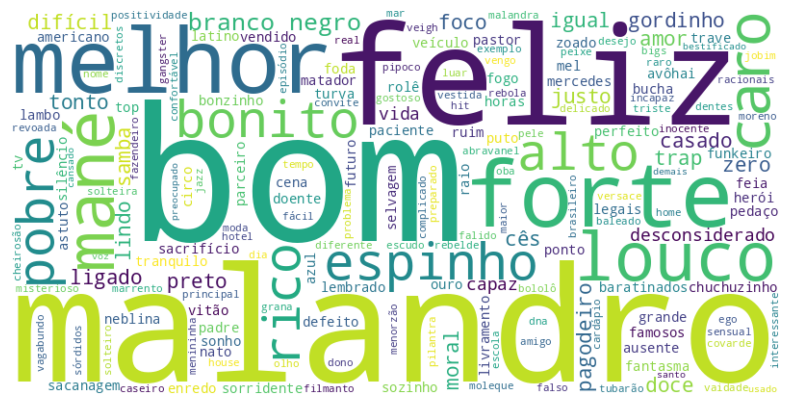

In [28]:
texto = ' '.join(listaMasc['Adjetivo'])
nuvem_palavras = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
contagem_palavras = listaMasc['Adjetivo'].value_counts()
ranking_adjetivos = contagem_palavras.reset_index()
ranking_adjetivos.columns = ['Adjetivo', 'Frequência']
ranking_adjetivos.head(10)

,Adjetivo,Frequência
0,bom,8
1,malandro,7
2,feliz,5
3,forte,4
4,mané,4
5,melhor,4
6,louco,4
7,caro,3
8,branco,3
9,negro,3


In [30]:
listaMasc.shape

(252, 2)

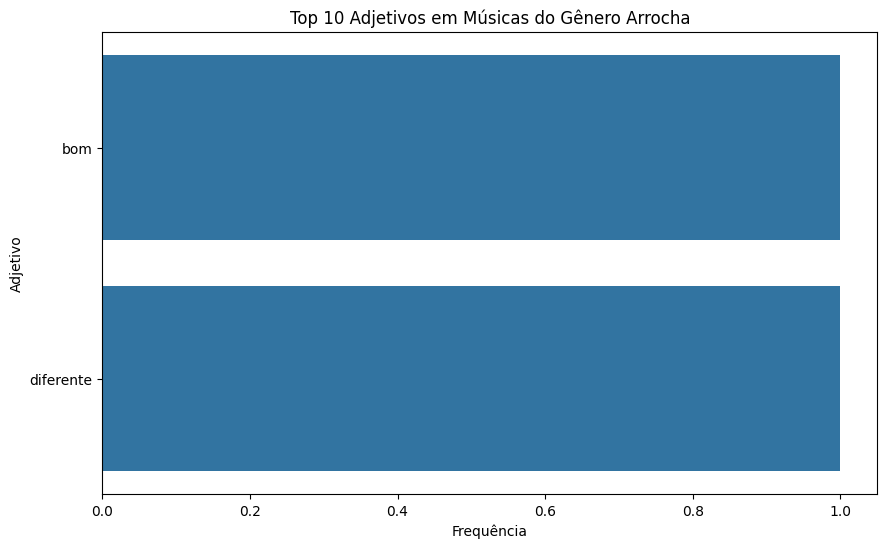

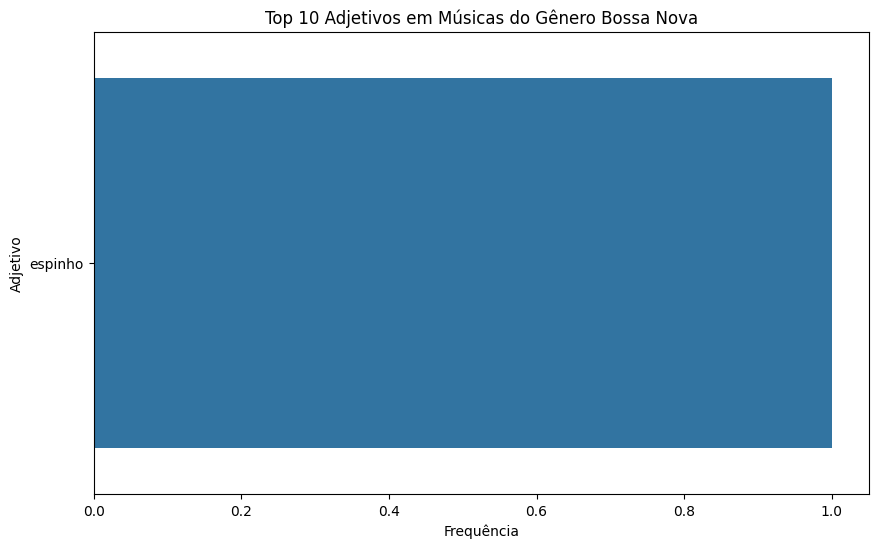

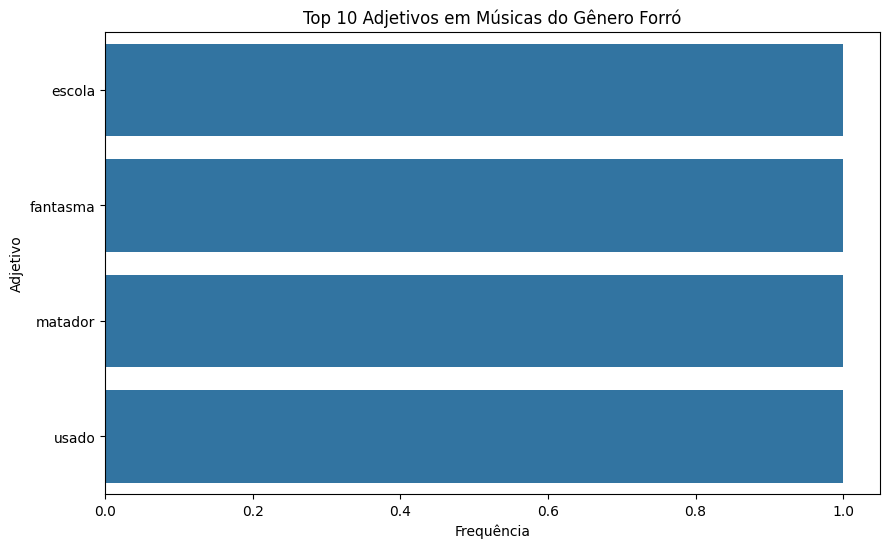

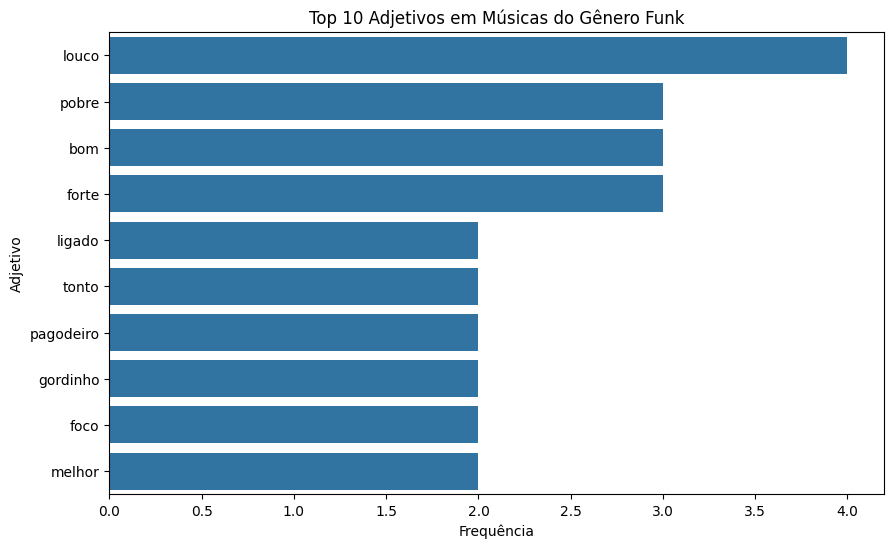

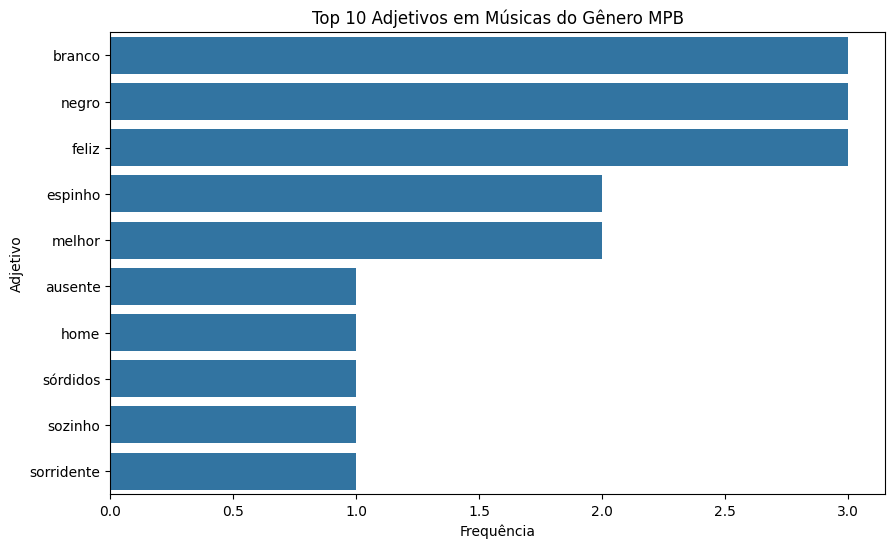

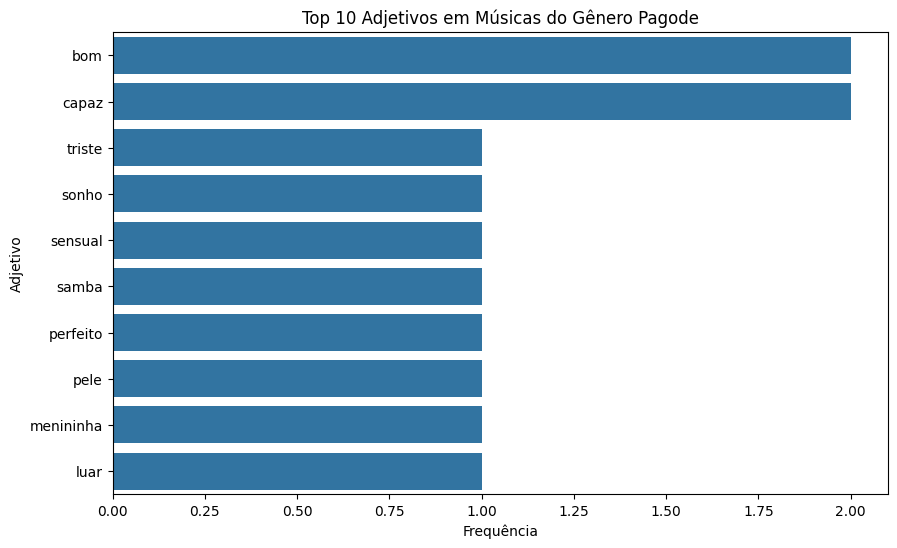

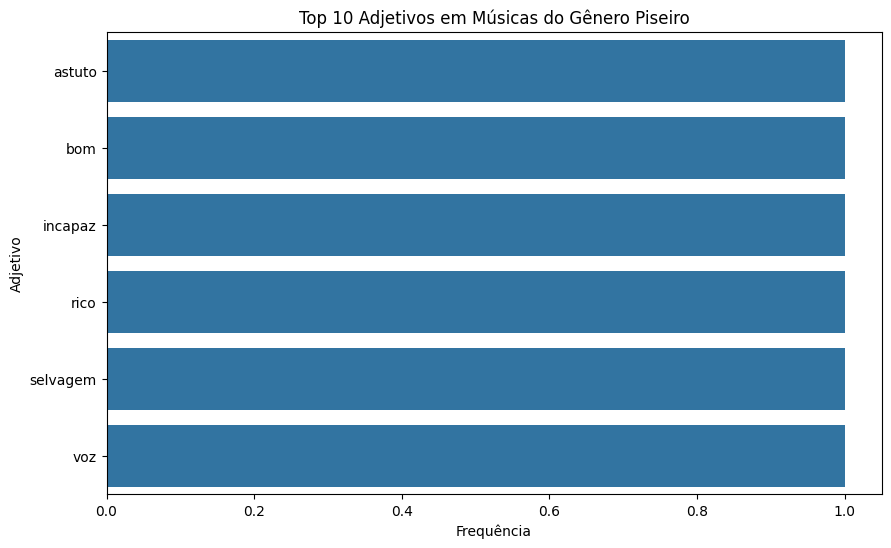

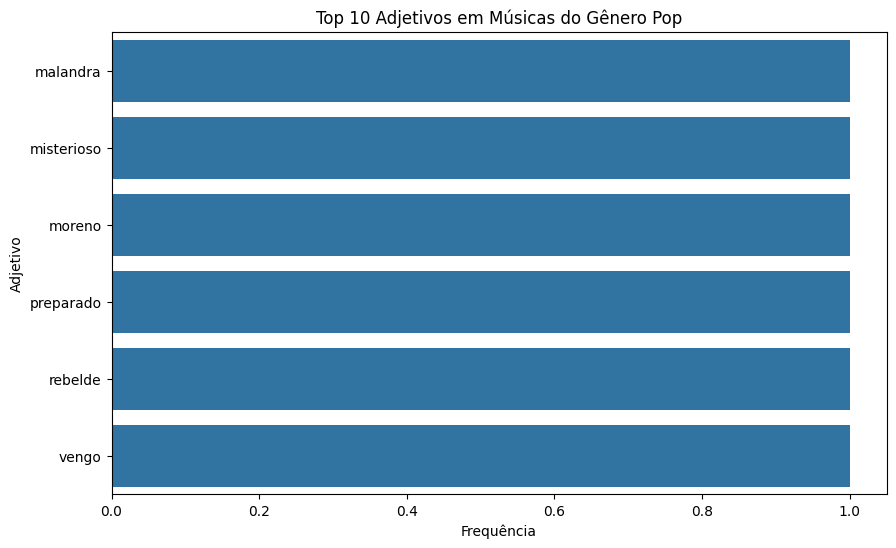

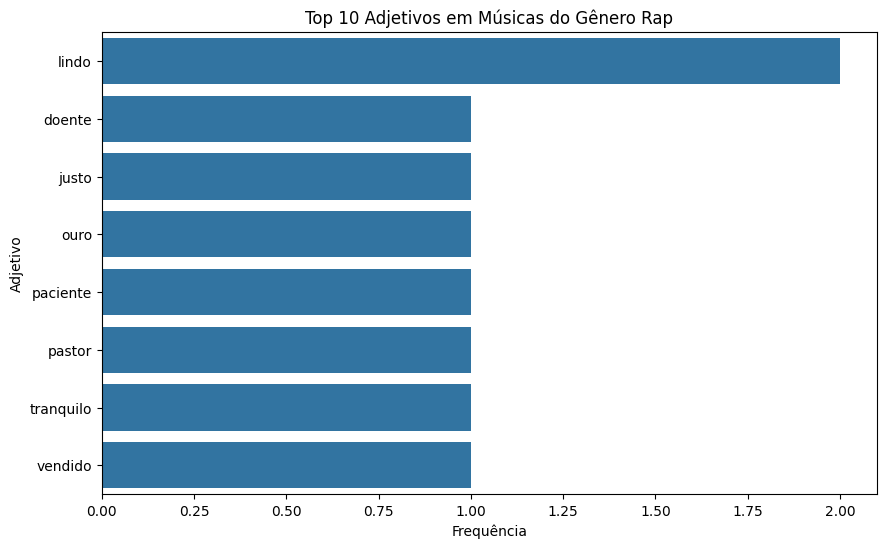

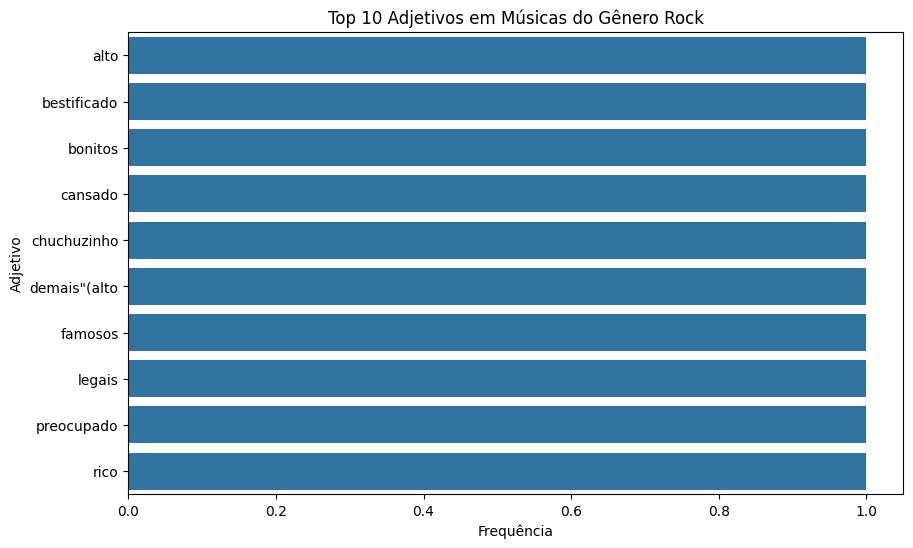

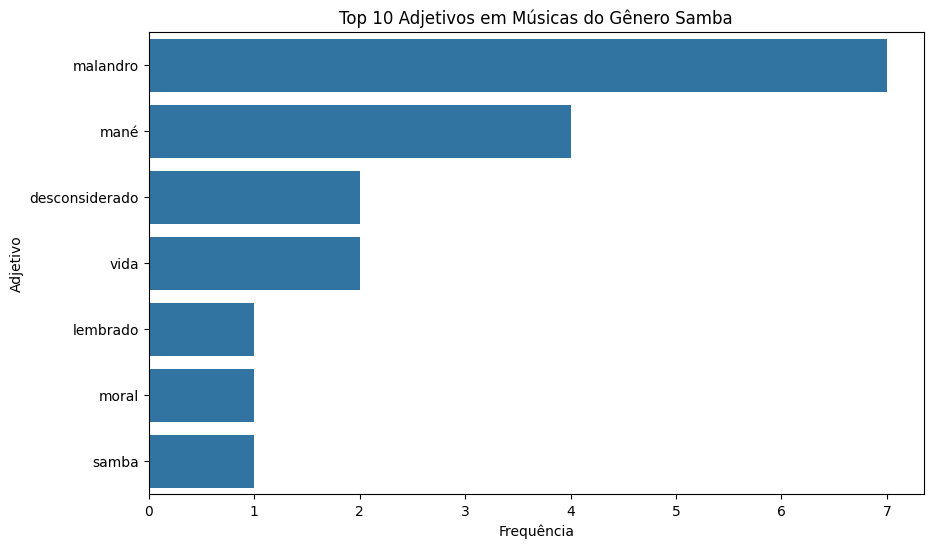

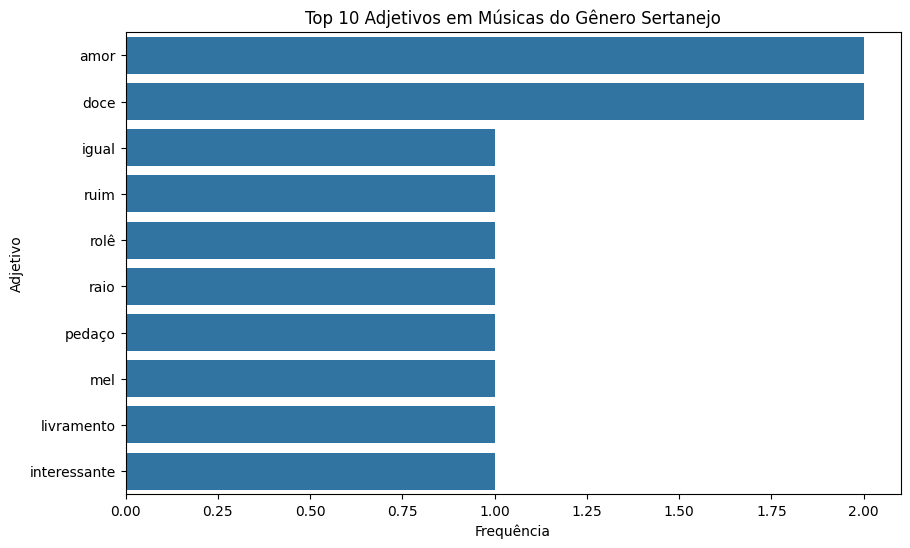

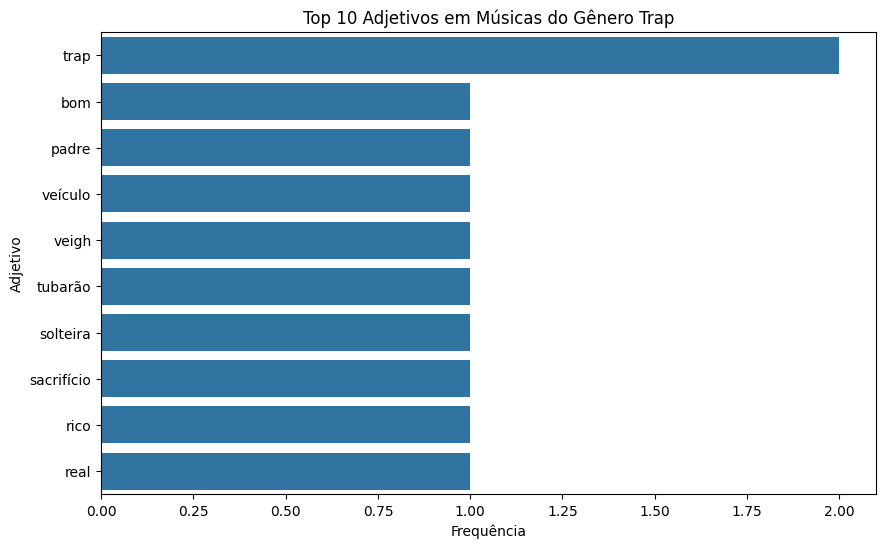

In [31]:
genero_e_palavras = resultados_df2[['ID', 'Gênero Musical']].merge(listaMasc, on='ID', how='left')
genero_e_palavras = genero_e_palavras.dropna(subset=['Adjetivo'])
contagem_por_genero = genero_e_palavras.groupby(['Gênero Musical', 'Adjetivo']).size().reset_index(name='Frequência')

generos = contagem_por_genero['Gênero Musical'].unique()

for genero in generos:
    dados_genero = contagem_por_genero[contagem_por_genero['Gênero Musical'] == genero]
    dados_genero = dados_genero.sort_values(by='Frequência', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequência', y='Adjetivo', data=dados_genero)
    plt.title(f'Top 10 Adjetivos em Músicas do Gênero {genero}')
    plt.xlabel('Frequência')
    plt.ylabel('Adjetivo')
    plt.show()


In [32]:
resultados_df2.to_csv('resultados_df2.csv', index=False)
files.download('resultados_df2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>